# Problem Set 6

## Question 1

In [1]:
import pandas as pd
import numpy as np

### (a) Import the data using pandas.read csv() function. Look for characters that seem out of place that might indicate missing values. Replace them with missing values using the na values=... option.

In [2]:
auto = pd.read_csv('data/Auto.csv')

In [3]:
auto.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,397.000000,397.000000,397.000000,397,397.000000,397.000000,397.000000,397.000000,397
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,304
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.515869,5.458438,193.532746,NaN,2970.261965,15.555668,75.994962,1.574307,NaN
std,7.825804,1.701577,104.379583,NaN,847.904119,2.749995,3.690005,0.802549,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.000000,NaN,2223.000000,13.800000,73.000000,1.000000,NaN
50%,23.000000,4.000000,146.000000,NaN,2800.000000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3609.000000,17.100000,79.000000,2.000000,NaN


In [4]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [5]:
auto = auto[auto.horsepower.apply(lambda x: x.isnumeric())]
auto['horsepower']= pd.to_numeric(auto['horsepower'])

In [6]:
auto['horsepower'].mean()

104.46938775510205

### b) Produce a scatterplot matrix which includes all of the quantitative vari- ables (mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin). [Use the pandas scatterplot function in the code block below.]

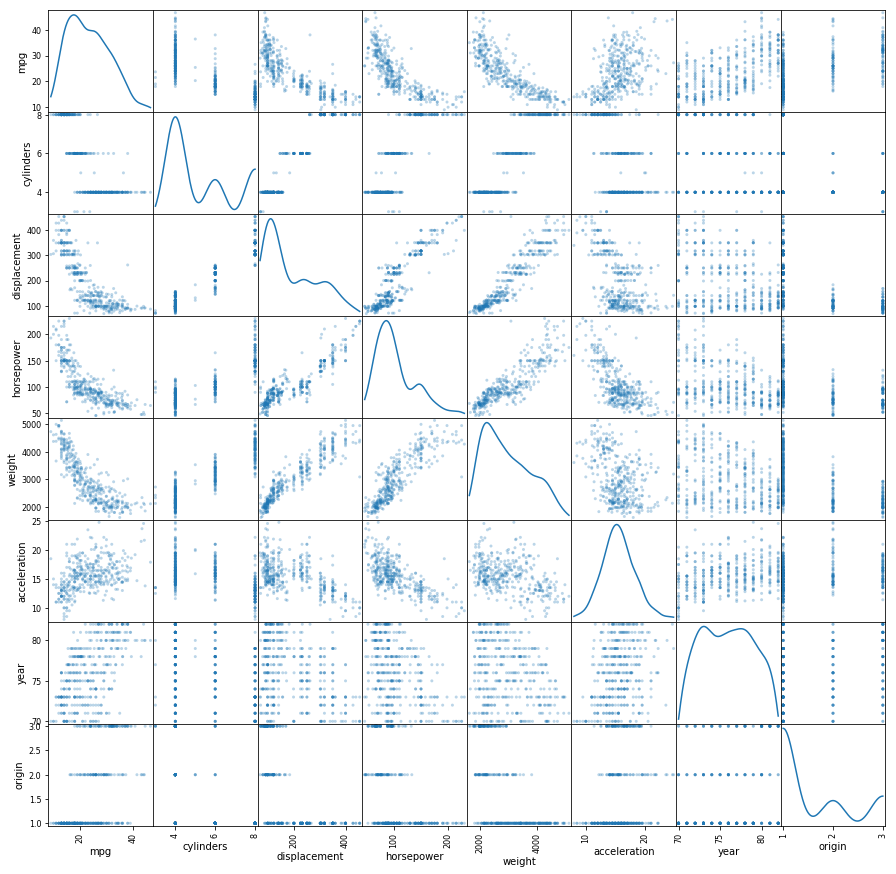

In [8]:
from pandas.plotting import scatter_matrix

scatmat=scatter_matrix(auto, alpha=0.3, figsize=(15, 15), diagonal='kde')

### c) Compute the correlation matrix for the quantitative variables (8×8) using the DataFrame.corr() method.

In [9]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### d) Estimate the following multiple linear regression model of mpg on all other quantitative variables, where $u_i$ is an error term for each observation, using Python’s statsmodels.api.OLS() function.

$$mpg_i = \beta_0 + \beta_1cylinders_i + \beta_2displacement_i + \beta_3horsepower_i + ... \beta_4weight_i + \beta_5acceleration_i + \beta_6year_i + \beta_7origin_i + u_i$$

In [10]:
auto = auto.convert_objects(convert_numeric=True)
auto['const'] = 1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [11]:
import statsmodels.api as sm

reg_auto = sm.OLS(endog=auto['mpg'], 
                  exog=auto[['const', 'cylinders','displacement','horsepower',
                            'weight','acceleration','year','origin']], missing='drop')
results_auto = reg_auto.fit()

In [12]:
results_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 16 Feb 2020   Prob (F-statistic):          2.04e-139
Time:                        14:04:53   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### i. Which of the coefficients is statistically significant at the 1% level?

Displacement, weight, year and origin are significant at the 1% level

#### ii. Which of the coefficients is NOT statistically significant at the 10% level?

Cylinders, horsepower and acceleration are not significant at the 10% level

#### iii. Give an interpretation in words of the estimated coefficient $\hat\beta_6$ on $year_i$ using the estimated value of $\hat\beta_6$.

For every one year increase, we expect the miles per gallon of a car to increase by .7508 units

### e)  Looking at your scatterplot matrix from part (b), what are the three variables that look most likely to have a nonlinear relationship with $mpg_i$? Displacement, horsepower and weight look most likely to have a nonlinear relationship with $mpg_i$


#### i. Estimate a new multiple regression model by OLS in which you include squared terms on the three variables you identified as having a non-linear relationship to $mpg_i$ as well as a squared term on $acceleration_i$.

In [13]:
auto['disp_sq'] = auto['displacement']**2
auto['horse_sq'] = auto['horsepower']**2
auto['weight_sq'] = auto['weight']**2
auto['acc_sq']=auto['acceleration']**2

In [14]:
reg_auto2 = sm.OLS(endog=auto['mpg'], 
                  exog=auto[['const', 'cylinders','displacement','horsepower',
                             'weight','acceleration','year','origin','disp_sq',
                             'horse_sq','weight_sq','acc_sq']], missing='drop')
results_auto2 = reg_auto2.fit()

In [15]:
results_auto2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 16 Feb 2020   Prob (F-statistic):          1.75e-160
Time:                        14:05:00   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           20.1084      6.696      3.003      0.003       6.943      33.274
cylinders        0.2519      0.326      0.773      0.440      -0.389       0.893
displacement    -0.0169      0.020     -0.828      0.408      -0.057       0.023
horsepower      -0.1635      0.041     -3.971      0.000      -0.244      -0.083
weight          -0.0136      0.003     -5.069      0.000      -0.019      -0.008
acceleration    -2.0884      0.557     -3.752      0.000      -3.183      -0.994
year             0.7810      0.045     17.512      0.000       0.693       0.869
origin           0.6104      0.263      2.320      0.021       0.093       1.128
disp_sq       2.257e-05   3.61e-05      0.626      0.532   -4.83e-05    9.35e-05
horse_sq         0.0004      0.000      2.943      0.003       0.000       0.001
weight_sq     1.514e-06   3.69e-07      4.105      0.000    7.89e-07    2.24e-06
acc_sq           0.0576      0.016      3.496      0.001       0.025       0.090
==============================================================================
Omnibus:                       33.614   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.985
Skew:                           0.438   Prob(JB):                     1.16e-17
Kurtosis:                       5.002   Cond. No.                     5.13e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### ii. Report your adjusted R-squared statistic. Is it better or worse than the adjusted R-squared from part (d)?
The adjusted R-sqaured statistic is $0.866$. This higher than the adjusted R-sqaured statistic from part (d) ($0.818$)

#### iii. What happened to the statistical significance of the $displacement_i$ variable coefficient and the coefficient on its squared term?
In the part (d) regression, the coefficient on $displacement_i$ is positive and statistically significant at the 0.01 level. 
In the part (e) regression, the coefficient on $displacement_i$ is negative and not statistically significant. The coefficient on $displacement^2$ is very close to zero and also not siginificant.

#### iv. What happened to the statistical significance of the cylinders variable?
In the the part (d) regression, the coefficient on the cylinders variables is negative and not statistically significant.
In the part (e) regression, the coefficient on the cylinders variables is positive but still not statistically significant.

### f) Using the regression model from part (e) and the .predict() function, what would be the predicted miles per gallon mpg of a car with 6 cylinders, displacement of 200, horsepower of 100, a weight of 3,100, acceleration of 15.1, model year of 1999, and origin of 1?


In [16]:
mpg_predict = results_auto2.predict(exog=[1, 6,200,100,3100,15.1,99,1,200**2,100**2,3100**2,15.1**2])
print(mpg_predict)

[38.7321111]


## Question 2

### (a) Compute the Euclidean distance between each observation and the test point $X1 =X2 =X3 =0$. $$dist(p,q)= \sqrt{(q_1 −p_1)^2 +(q_2 −p_2)^2 +(q_3 −p_3)^2}$$

In [22]:
df = pd.DataFrame()
df['Obs'] = [1,2,3,4,5,6]
df['x1'] = [0,2,0,0,-1,1]
df['x2'] = [3,0,1,1,0,1]
df['x3'] = [0,0,3,2,1,1]
df['y'] = ['r','r','r','g','g','r']
df

,Obs,x1,x2,x3,y
0,1,0,3,0,r
1,2,2,0,0,r
2,3,0,1,3,r
3,4,0,1,2,g
4,5,-1,0,1,g
5,6,1,1,1,r


In [23]:
dist_list = []
for i in range(len(df)):
    row = df.iloc[i,] 
    x1 = row['x1']
    x2 = row['x2']
    x3 = row['x3']
    dist = np.sqrt((x1**2)+(x2**2)+(x3**2))
    dist_list.append(dist)
    
df['Distance']=dist_list
df

,Obs,x1,x2,x3,y,Distance
0,1,0,3,0,r,3.000000
1,2,2,0,0,r,2.000000
2,3,0,1,3,r,3.162278
3,4,0,1,2,g,2.236068
4,5,-1,0,1,g,1.414214
5,6,1,1,1,r,1.732051


### b) What is our KNN prediction with K = 1? Why?

Green. We are only choosing the closest neighbor to compare the test point to. The shortest distance from the test point is observation 5, which is green.

### c) What is our KNN prediction with K = 3? Why?

Red. The three closest points to the test point are obsrvations 4,5, and 2. Two-thirds of the nearest neighbors are red, so in terms of the KNN approach, we predict that our test point is red.

### d) If the Bayes (optimal) decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

We would want K to be smaller. A smaller K will imitate a more flexible, less linear boundary.

### e) Use Python’s scikit-learn library to estimate the KNN classifier of the testpoint $X1 = X2 = X3 = 1$ with $K=2$.

In [80]:
from sklearn.neighbors import KNeighborsClassifier
#Red = 0
#Green = 1

X = pd.DataFrame()
X['x1'] = [0,2,0,0,-1,1]
X['x2'] = [3,0,1,1,0,1]
X['x3'] = [0,0,3,2,1,1]

X['Distance2'] = np.sqrt(((X['x1']-1)**2) + ((X['x2']-1)**2) + ((X['x3']-1)**2))

In [81]:
Y= np.array([0,0,0,1,1,0])

In [82]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [84]:
knn.predict(X_test)

array([0, 0])

In [85]:
knn.score(X_test, Y_test)

0.5

## Question 3
Multivariable logistic (logit) regression (3 points)

In this problem, you will use the Auto.csv dataset from Exercise 1. We will study the factors that make miles per gallon high or low. Create a binary variable mpg_high that equals $1$ if mpg_high $\geq$ median(mpg_high) and equals $0$ if mpg_high < median(mpg_ high).


In [159]:
auto2 = pd.read_csv('data/Auto.csv')
auto2 = auto2[auto2.horsepower.apply(lambda x: x.isnumeric())]
auto2['horsepower']= pd.to_numeric(auto2['horsepower'])
auto2 = auto2.convert_objects(convert_numeric=True)
auto2['const'] = 1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [160]:
auto2['mpg_high']= np.where(auto2['mpg']>=np.median(auto2['mpg']), 1, 0)
auto2.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,const,mpg_high
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,1,0


### a) 
Use statsmodel.api to estimate the logistic regression of mpg_high on the regressors from Exercise 1: number of cylinders (cyl), engine displacement (dspl), horsepower (hpwr), vehicle weight (wgt), acceleration (accl), vehicle year (yr), vehicle origin (orgn). Make sure to include a constant term. Report all the regressors that have coefficients that are statistically significant at the $5%$ level ($p \leq 0.05$).

Pr(mpg_high = $1|X\beta) = \frac{e^{Xβ}}{1+e^{Xβ}}$,<br>
where $X\beta = \beta_0 + \beta_1cyl_i + \beta_2dspl_i + \beta_3hpwr_i + \beta_4wgt_i + \beta_5accli+ \beta_6yr_i + \beta_7orgn_i$

In [161]:
reg_auto3 = sm.Logit(endog=auto2['mpg_high'], 
                  exog=auto2[['const', 'cylinders','displacement','horsepower',
                            'weight','acceleration','year','origin']], missing='drop')
results_auto3 = reg_auto3.fit()
results_auto3.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 16 Feb 2020   Pseudo R-squ.:                  0.7101
Time:                        16:34:29   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021      0.012      0.174      0.862      -0.021       0.026
horsepower      -0.0410      0.024     -1.718      0.086      -0.088       0.006
weight          -0.0043      0.001     -3.784      0.000      -0.007      -0.002
acceleration     0.0161      0.141      0.114      0.910      -0.261       0.293
year             0.4295      0.075      5.709      0.000       0.282       0.577
origin           0.4773      0.362      1.319      0.187      -0.232       1.187
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Significant at $0.05$ level: Weight, Year

### b) 
Divide the data into a training set of half of the data randomly selected and
a test set of the remaining half of the data using the .train test split module of the scikit-learn.cross validation package. Set the test size = 0.5 and set the random state=10.


In [166]:
Xa = auto2.drop(columns=['mpg_high','name','mpg'])
Ya = auto2['mpg_high'].values

In [167]:
Xa_train, Xa_test, ya_train, ya_test = \
    train_test_split(Xa, Ya, test_size = 0.5, random_state=10)

### c) 
Use scikit-learn to estimate a logistic regression model on the training
data. Report your estimated intercept $\beta_0$ and coefficients ($\beta_1$, $\beta_2$, ...$\beta_7$). [Note. These estimates will be different from the estimates in part (a) because you are only using half the data.]

In [171]:
from sklearn.linear_model import LogisticRegression

In [172]:
logit_model=sm.Logit(ya_train,Xa_train)
result_logit=logit_model.fit()
print(result_logit.summary())


Optimization terminated successfully.
         Current function value: 0.130082
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  196
Model:                          Logit   Df Residuals:                      188
Method:                           MLE   Df Model:                            7
Date:                Sun, 16 Feb 2020   Pseudo R-squ.:                  0.8123
Time:                        16:36:13   Log-Likelihood:                -25.496
converged:                       True   LL-Null:                       -135.85
                                        LLR p-value:                 4.683e-44
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -1.8304      0.809     -2.263      0.024      -3.416      -0.245
displacement     0.028

$\beta_0= -26.7996$ <br>
$\beta_1= -1.8304$ <br>
$\beta_2= 0.0281$ <br>
$\beta_3= 0.0153$ <br>
$\beta_4= -0.0075$ <br>
$\beta_5= 0.1094$ <br>
$\beta_6= 0.6432$ <br>
$\beta_7= 0.2444$ <br>

### d) 
Create predicted values of mpg_high for the test set and calculate the confusion matrix and classification report for the Logit model on the test data. Does this model predict low mpg (mpg_high=0) or high mpg (mpg_high=1) better?

In [180]:
predictions = logisticRegr.predict(Xa_test)
predictions

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0])

In [ ]:
score = logisticRegr.score(Xa_test, ya_test)
print(score)